### Imports

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib as job
import warnings

### Load Data

In [21]:
dataset = load_wine()

In [22]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [23]:
dataset.target.shape

(178,)

In [24]:
df = pd.concat([df, pd.Series(dataset.target)], axis=1).rename(columns={0 : 'target'})
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### EDA

In [25]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [26]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [27]:
features, target = df[df.columns[:-1]], df[['target']]

In [28]:
features.values.shape

(178, 13)

#### Dimensionality Reduction Visualization

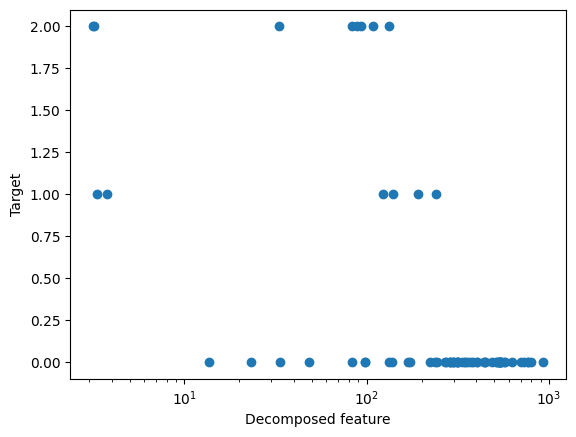

In [29]:
pca = PCA(n_components=1)
features_decomposed = pca.fit_transform(features.values)
plt.scatter(features_decomposed, target.values.flatten())
plt.xscale('log')
plt.xlabel('Decomposed feature')
plt.ylabel('Target')
plt.show()

<Axes: >

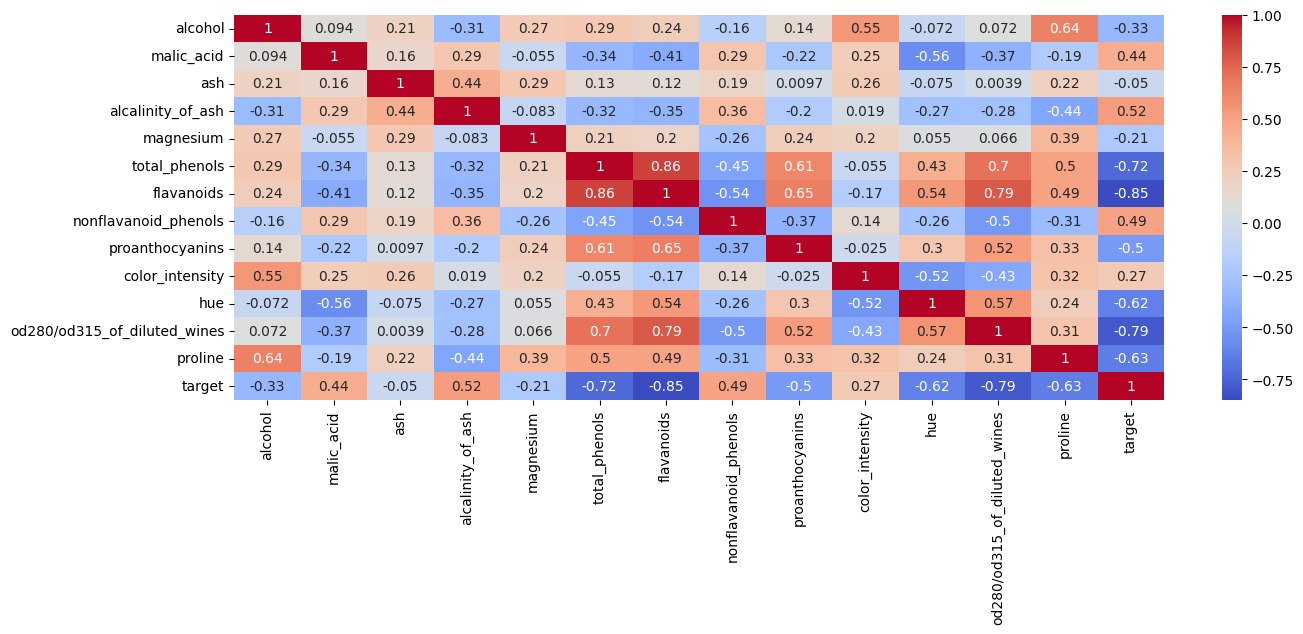

In [30]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Custom Transformer for Normalization

In [31]:
class ConditionalNormalizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, include=True, norm='l2') -> None:
        self.include = include
        self.norm = norm
        self.normalizer = Normalizer(norm=self.norm) if self.include else None
    
    def fit(self, x, y=None):
        if self.include:
            self.normalizer.fit(x)
        return self

    def transform(self, x):
        if self.include:
            return self.normalizer.transform(x)
        return x

### Pipelines

In [32]:
num_pipeline = Pipeline([
    ('Impute', SimpleImputer()),
    ('Scale', StandardScaler()),
    ('Normalize', Normalizer()),
])

In [33]:
cat_pipeline = Pipeline([
    ('Impute', KNNImputer()),
    # ('Encode', OneHotEncoder())
])

In [34]:
col_trans = ColumnTransformer(transformers=[
    ('Num_pipeline', num_pipeline, df.columns[:-1].tolist()),
    ('Cat_pipeline', cat_pipeline, df['target'])
], remainder='drop')

#### Main pipeline

In [35]:
clf_pipeline = Pipeline([
    ('Col_trans', col_trans),
    ('Model', LogisticRegression(multi_class='multinomial', random_state=40, penalty='l2', C=5)),
])
clf_pipeline

Pipeline(steps=[('Col_trans',
                 ColumnTransformer(transformers=[('Num_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer()),
                                                                  ('Scale',
                                                                   StandardScaler()),
                                                                  ('Normalize',
                                                                   Normalizer())]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline']),
                                                 ('Cat_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   KNNImputer())]),
                                                  0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32)])),
                ('Model',
                 LogisticRegression(C=5, multi_class='multinomial',
                                    random_state=40))])

### Training

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

In [37]:
clf_pipeline.fit(x_train, y_train)

c:\Users\Lenovo\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('Col_trans',
                 ColumnTransformer(transformers=[('Num_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer()),
                                                                  ('Scale',
                                                                   StandardScaler()),
                                                                  ('Normalize',
                                                                   Normalizer())]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline']),
                                                 ('Cat_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   KNNImputer())]),
                                                  0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32)])),
                ('Model',
                 LogisticRegression(C=5, multi_class='multinomial',
                                    random_state=40))])

In [38]:
y_pred = clf_pipeline.predict(x_test)

In [39]:
accuracy_score(y_pred, y_test)

1.0

In [40]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('Col_trans',
   ColumnTransformer(transformers=[('Num_pipeline',
                                    Pipeline(steps=[('Impute', SimpleImputer()),
                                                    ('Scale', StandardScaler()),
                                                    ('Normalize', Normalizer())]),
                                    ['alcohol', 'malic_acid', 'ash',
                                     'alcalinity_of_ash', 'magnesium',
                                     'total_phenols', 'flavanoids',
                                     'nonflavanoid_phenols', 'proanthocyanins',
                                     'color_intensity', 'hue',
                                     'od280/od315_of_diluted_wines', 'proline']),
                                   ('Cat_pipeline',
                                    Pipeline(steps=[('Impute', KNNImputer())]),
                                    0      0
   1      0
   2      0
   3      0
   4      0
   

### Hyperparameter Tuning

In [41]:
param_grid = {
    'Model__C': np.logspace(-4, 4, 20),
    'Model__penalty': ['none', 'l2'],
    'Col_trans__Num_pipeline__Scale': [StandardScaler(), MinMaxScaler(), RobustScaler, MaxAbsScaler()],
    'Model__max_iter': [100, 500, 1000]
}

In [42]:
gs = GridSearchCV(clf_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

In [43]:
warnings.simplefilter('ignore')
gs.fit(x_train, y_train)
warnings.resetwarnings()

In [44]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Col_trans__Num_pipeline__Scale,param_Model__C,param_Model__max_iter,param_Model__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028909,0.007194,0.010545,0.005504,StandardScaler(),0.0001,100,none,{'Col_trans__Num_pipeline__Scale': StandardSca...,0.965517,0.965517,0.964286,0.964286,0.964286,0.964778,0.000603,81
1,0.019701,0.004467,0.007638,0.002328,StandardScaler(),0.0001,100,l2,{'Col_trans__Num_pipeline__Scale': StandardSca...,0.551724,0.620690,0.607143,0.500000,0.571429,0.570197,0.042860,352
2,0.038164,0.018935,0.008901,0.002319,StandardScaler(),0.0001,500,none,{'Col_trans__Num_pipeline__Scale': StandardSca...,0.965517,0.965517,0.964286,0.964286,0.964286,0.964778,0.000603,81
3,0.016398,0.005964,0.006039,0.001992,StandardScaler(),0.0001,500,l2,{'Col_trans__Num_pipeline__Scale': StandardSca...,0.551724,0.620690,0.607143,0.500000,0.571429,0.570197,0.042860,352
4,0.017397,0.002330,0.004968,0.000575,StandardScaler(),0.0001,1000,none,{'Col_trans__Num_pipeline__Scale': StandardSca...,0.965517,0.965517,0.964286,0.964286,0.964286,0.964778,0.000603,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.032004,0.007203,0.009480,0.005366,MaxAbsScaler(),10000.0,100,l2,{'Col_trans__Num_pipeline__Scale': MaxAbsScale...,0.965517,0.931034,0.964286,0.964286,0.964286,0.957882,0.013432,238
476,0.021820,0.004499,0.005909,0.001685,MaxAbsScaler(),10000.0,500,none,{'Col_trans__Num_pipeline__Scale': MaxAbsScale...,0.931034,0.931034,0.964286,1.000000,1.000000,0.965271,0.030846,39
477,0.075504,0.003980,0.006063,0.000951,MaxAbsScaler(),10000.0,500,l2,{'Col_trans__Num_pipeline__Scale': MaxAbsScale...,1.000000,0.965517,0.964286,0.964286,0.928571,0.964532,0.022593,145
478,0.021579,0.002765,0.005793,0.000993,MaxAbsScaler(),10000.0,1000,none,{'Col_trans__Num_pipeline__Scale': MaxAbsScale...,0.931034,0.931034,0.964286,1.000000,1.000000,0.965271,0.030846,39


In [45]:
print(gs.score(x_test, y_test))
print(gs.best_score_)
print(gs.best_params_)

0.9722222222222222
0.9928571428571429
{'Col_trans__Num_pipeline__Scale': MinMaxScaler(), 'Model__C': 29.763514416313132, 'Model__max_iter': 500, 'Model__penalty': 'l2'}


### Updated Pipeline

In [46]:
clf_pipeline.set_params(**gs.best_params_)

Pipeline(steps=[('Col_trans',
                 ColumnTransformer(transformers=[('Num_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer()),
                                                                  ('Scale',
                                                                   MinMaxScaler()),
                                                                  ('Normalize',
                                                                   Normalizer())]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline']),
                                                 ('Cat_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   KNNImputer())]),
                                                  0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32)])),
                ('Model',
                 LogisticRegression(C=29.763514416313132, max_iter=500,
                                    multi_class='multinomial',
                                    random_state=40))])

In [47]:
clf_pipeline.fit(x_train, y_train)

c:\Users\Lenovo\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('Col_trans',
                 ColumnTransformer(transformers=[('Num_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer()),
                                                                  ('Scale',
                                                                   MinMaxScaler()),
                                                                  ('Normalize',
                                                                   Normalizer())]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline']),
                                                 ('Cat_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   KNNImputer())]),
                                                  0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32)])),
                ('Model',
                 LogisticRegression(C=29.763514416313132, max_iter=500,
                                    multi_class='multinomial',
                                    random_state=40))])

In [48]:
y_pred = clf_pipeline.predict(x_test)

In [49]:
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9722222222222222
[[12  0  0]
 [ 0 11  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [50]:
job.dump(clf_pipeline, "pipeline.joblib")

['pipeline.joblib']

In [52]:
job.dump(clf_pipeline.named_steps['Model'], 'model.pkl')

['model.pkl']